In [1]:
!pip install matplotlib

In [44]:
!pip install seaborn

In [211]:
!pip install scipy

# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [217]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.dates as dates

## load the data sets

In [2]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('PTUA2023-master/PTUA2023-master/Lab06/data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('PTUA2023-master/PTUA2023-master/Lab06/data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [3]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [4]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

<Figure size 1000x800 with 0 Axes>

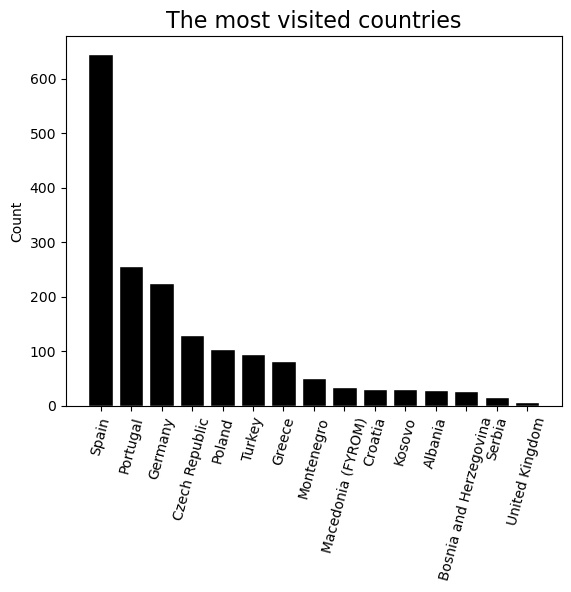

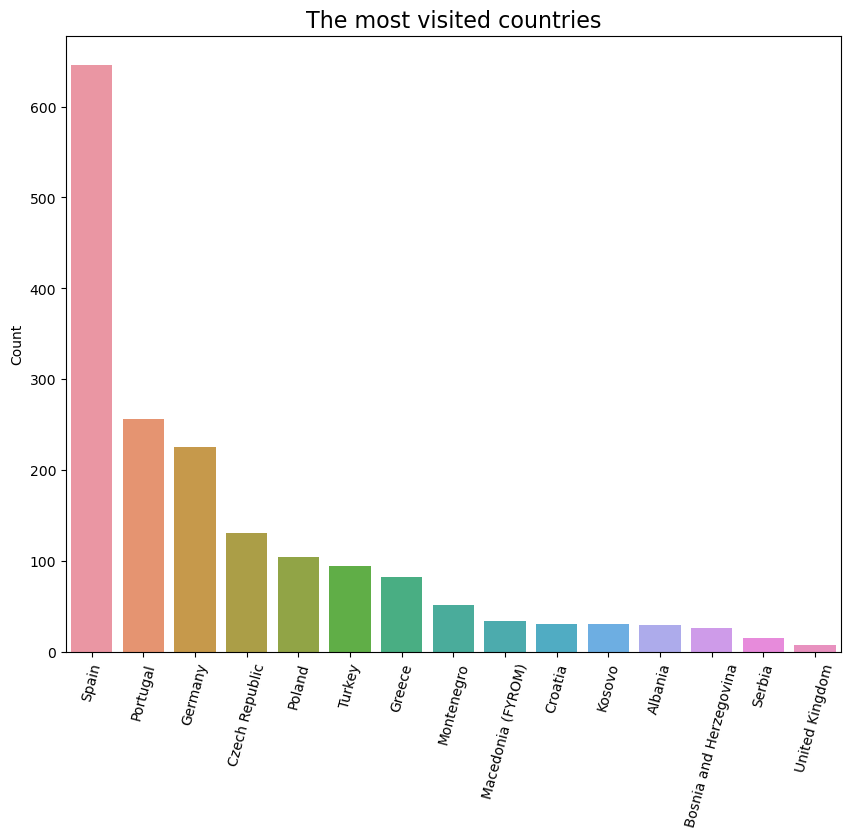

In [68]:
# Q1: Can you draw a bar chart for the most visited countries by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

#matplotlib
plt.figure(1, figsize=(10,8))
list1 = df['country'].value_counts()
fig, ax = plt.subplots()
ax.bar(list1.index,list1,color='k',edgecolor='w',width=0.8)
ax.set_title('The most visited countries', fontsize=16)
ax.set_ylabel('Count')
ax.tick_params('x',rotation=75)
plt.show()

#seaborn 
plt.figure(1, figsize=(10,8))
sns.barplot(x=list1.index,y=list1)
plt.title('The most visited countries', fontsize=16)
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

Now you try: re-create the plot above, but make the bars orange with maroon edges.

<Figure size 1000x800 with 0 Axes>

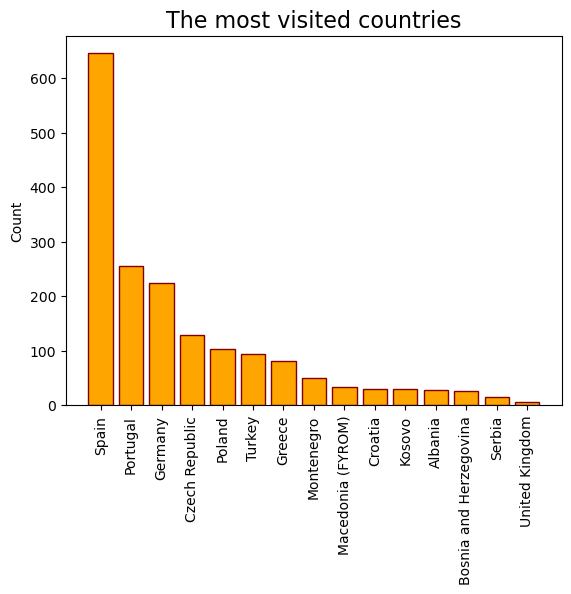

In [71]:
#matplotlib with different color
plt.figure(1, figsize=(10,8))
list1 = df['country'].value_counts()
fig, ax = plt.subplots()
ax.bar(list1.index,list1,color='orange',edgecolor='maroon', width = .8)
ax.set_title('The most visited countries', fontsize=16)
ax.set_ylabel('Count')
ax.tick_params('x',rotation=90)
plt.show()

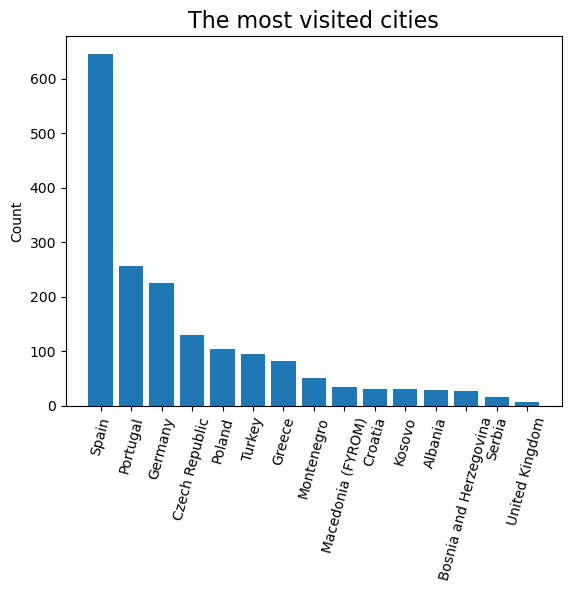

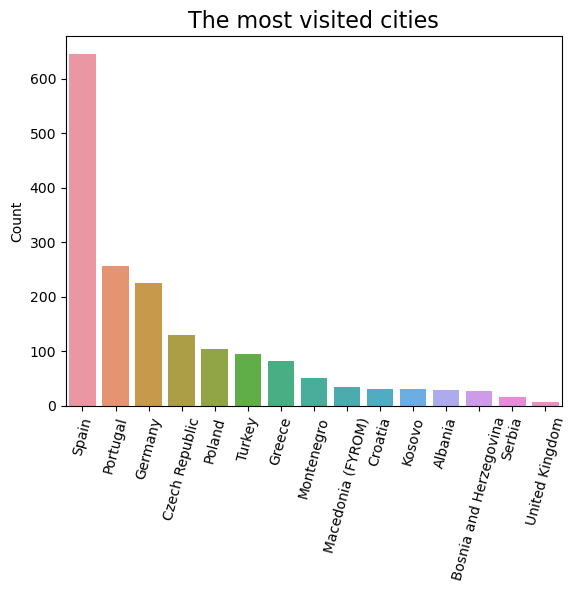

In [73]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries

#matplotlib
list2 = df['city'].value_counts()
fig, ax = plt.subplots()
ax.bar(list1.index,list1)
ax.set_title('The most visited cities', fontsize=16)
ax.set_ylabel('Count')
ax.tick_params('x',rotation=75)
plt.show()

#seaborn
sns.barplot(x=list1.index,y=list1)
plt.title('The most visited cities', fontsize=16)
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

## Next: scatter plots as simple maps

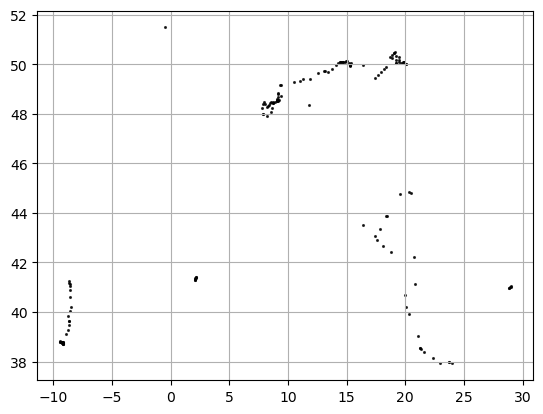

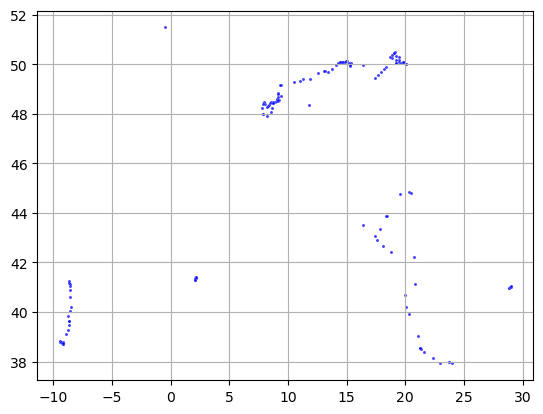

In [39]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 

#matplotlib
#print(rs.shape) #for checking the data size
fig,ax = plt.subplots()
ax.scatter(rs['lon'], rs['lat'],s=1.5,color='black',alpha = 0.75)
plt.grid()
plt.show()

#seaborn
fig = sns.scatterplot(data=rs, x='lon',y='lat',s= 5,color='b',alpha = 0.75)
plt.grid()
fig.set(ylabel=None)
fig.set(xlabel=None)
plt.show()


## Line charts, with annotation

In [40]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

<Figure size 1000x800 with 0 Axes>

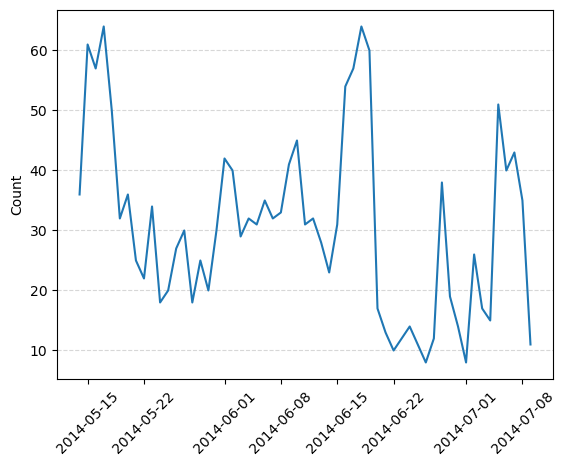

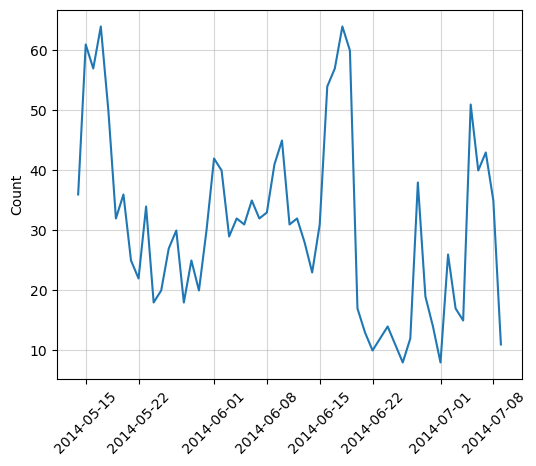

In [81]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 

# matplotlib
plt.figure(1, figsize=(10,8))
fig, ax = plt.subplots()
ax.plot(countdata.index,countdata)
ax.set_ylabel('Count')
ax.tick_params('x',rotation=45)
plt.grid(linestyle='--', axis = 'y',alpha = .5)
plt.show()

# seaborn
plt.figure(1, figsize=(6,4.8))
fig2 = sns.lineplot(data = countdata)
fig2.set(ylabel='Count')
plt.xticks(rotation=45)
plt.grid(alpha = .5)
plt.show()


In [209]:
countdata.sort_values()
countdata.max()
countdata.index.max()
countdata.shape

(57,)

<Figure size 1000x800 with 0 Axes>

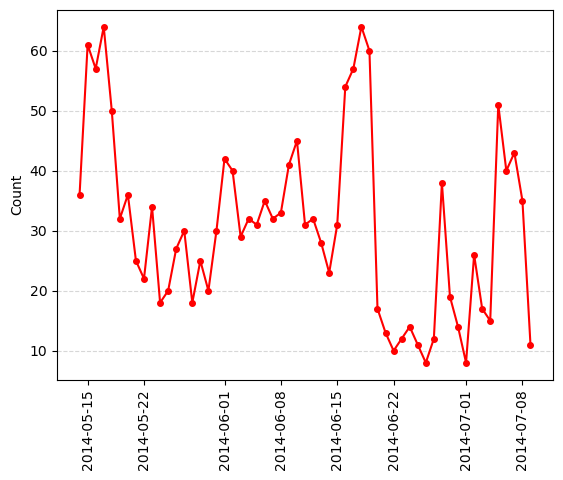

<Figure size 1000x800 with 0 Axes>

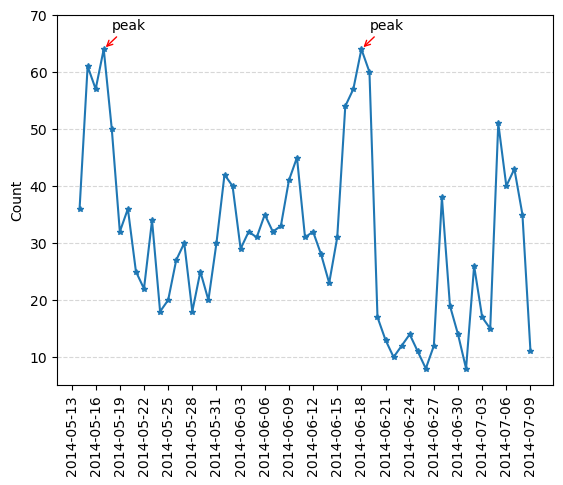

<Figure size 1000x800 with 0 Axes>

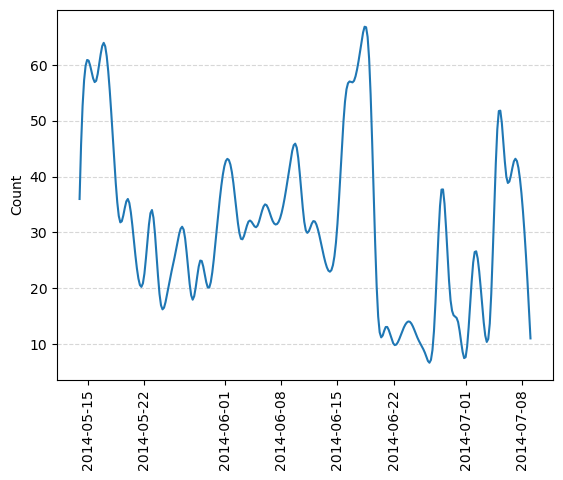

In [224]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

# matplotlib
plt.figure(1, figsize=(10,8))
fig, ax = plt.subplots()
ax.plot(countdata.index,countdata,linewidth = 1.5, color = 'r', marker = 'o',markersize=4)
ax.set_ylabel('Count')
ax.tick_params('x',rotation=90)
plt.grid(linestyle='--', axis = 'y',alpha = .5)

plt.show()

# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
plt.figure(1, figsize=(10,8))
fig, ax = plt.subplots()
ax.plot(countdata.index,countdata,linewidth = 1.5, color = '#1F77B4', marker = '*',markersize=4)
ax.set_ylabel('Count')
x_major_locator = plt.MultipleLocator(3)
ax.xaxis.set_major_locator(x_major_locator)
ax.tick_params('x',rotation=90)
plt.grid(linestyle='--', axis = 'y',alpha = .5)

ax.annotate("peak", xy=(pd.Timestamp('2014-05-17'),64),
           xytext = (pd.Timestamp('2014-05-18'),67.5),
           arrowprops = {"arrowstyle":"->","color":"red"})
ax.annotate("peak", xy=(pd.Timestamp('2014-06-18'),64),
           xytext = (pd.Timestamp('2014-06-19'),67.5),
           arrowprops = {"arrowstyle":"->","color":"red"})
ax.set_ylim(top=70)

plt.show()

# experiment with a more advanced challenge like smoothing the line:
date_num = dates.date2num(countdata.index)
xnew = np.linspace(date_num.min(), date_num.max(), 300)  
spl = make_interp_spline(date_num, countdata, k=3)  # type: BSpline
value_smooth = spl(xnew)

plt.figure(1, figsize=(10,8))
fig, ax = plt.subplots()
ax.plot(dates.num2date(xnew), value_smooth,linewidth = 1.5, color = '#1F77B4')
ax.set_ylabel('Count')
ax.tick_params('x',rotation=90)
plt.grid(linestyle='--', axis = 'y',alpha = .5)

plt.show()

## Pie charts

In [91]:
cities = df['city'].value_counts()
print("%s \n"%(cities.count()))

cities.head()
print("%s \n"%(cities.describe()))

print("%s \n"%(cities[cities>=4].shape))
print("%s \n"%(cities[cities>=6].shape))

113 

count    113.000000
mean      15.566372
std       63.698912
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max      632.000000
Name: city, dtype: float64 

30 

27 



<Figure size 3000x2400 with 0 Axes>

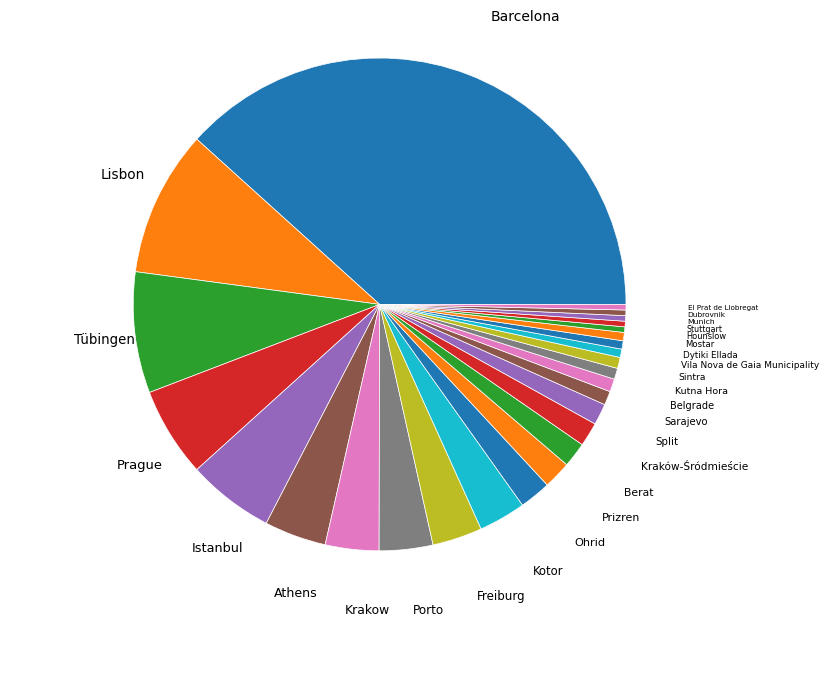

In [155]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer.

# plot
plt.figure(1, figsize=(30,24))
fig, ax = plt.subplots()
l_text,p_text=ax.pie(cities[cities >= 6], radius=10, center=(15, 15),labels = cities[cities >= 6].index,
       wedgeprops={"linewidth": .5, "edgecolor": "white"},labeldistance=1.25)

#use loop to set the label size
size = 10
for t in p_text:
    t.set_size(size)
    size -= 5/len(cities[cities >= 6])

ax.set(xlim=(0, 15),
       ylim=(0, 15))
plt.xticks([])
plt.yticks([])

plt.show()

## Reference

1. https://blog.csdn.net/lanchunhui/article/details/52931883<br>
2. https://blog.csdn.net/weixin_44520259/article/details/89917026<br>
3. https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot<b>
4. https://cloud.tencent.com/developer/article/1722766